<a href="https://colab.research.google.com/github/neel12kg/LSTMStockAnalysis/blob/main/LSTMLennar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving LEN Upd.csv to LEN Upd (1).csv


In [ ]:
df = pd.read_csv('LEN Upd (1).csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,3/2/09,6.302852,6.784661,5.624385,5.978368,5.494635,38121127.0
1,3/9/09,6.017699,8.633235,5.830875,8.348083,7.672608,38473923.0
2,3/16/09,8.485742,9.577188,7.551622,7.974435,7.329191,35742160.0
3,3/23/09,8.357915,11.061947,8.102262,10.088496,9.272198,46729116.0
4,3/30/09,9.587021,9.616519,6.912488,7.551622,6.940589,62408715.0
5,4/6/09,7.482793,8.043265,6.902655,8.043265,7.392453,27908209.0


In [ ]:
df.shape

(678, 7)

In [ ]:
future_days = 50

In [ ]:
df = df[['Close']]
df['Prediction'] = df[['Close']].shift(-future_days)
df.head(4)

,Close,Prediction
0,5.978368,17.020649
1,8.348083,16.135693
2,7.974435,16.725664
3,10.088496,16.057030


In [ ]:
X = np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)

[[ 5.978368]
 [ 8.348083]
 [ 7.974435]
 [10.088496]
 [ 7.551622]
 [ 8.043265]
 [ 9.183874]
 [ 9.803343]
 [ 9.301868]
 [10.147493]
 [ 8.662734]
 [ 9.27237 ]
 [ 9.351032]
 [ 8.308751]
 [ 7.846608]
 [ 7.659784]
 [ 9.026549]
 [ 9.006883]
 [ 8.180924]
 [ 9.577188]
 [10.924287]
 [11.642085]
 [13.205506]
 [13.185841]
 [14.277286]
 [15.46706 ]
 [14.847591]
 [15.447394]
 [16.263519]
 [14.346116]
 [12.812193]
 [14.090462]
 [14.405113]
 [13.893805]
 [12.389381]
 [13.903638]
 [14.228122]
 [13.441495]
 [12.645034]
 [12.222222]
 [11.651917]
 [12.241888]
 [13.136676]
 [12.556539]
 [15.683382]
 [15.693215]
 [14.53294 ]
 [15.103245]
 [14.46411 ]
 [16.6765  ]
 [17.020649]
 [16.135693]
 [16.725664]
 [16.05703 ]
 [15.840708]
 [17.994101]
 [16.843658]
 [17.227139]
 [16.863323]
 [20.186825]
 [19.587021]
 [17.197639]
 [18.102262]
 [17.177975]
 [17.010817]
 [15.211406]
 [15.290069]
 [14.493609]
 [14.434612]
 [13.421829]
 [14.32645 ]
 [13.815143]
 [14.680433]
 [14.523107]
 [14.149459]
 [13.107178]
 [12.556539]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
y = np.array(df['Prediction'])[:-future_days]
print(y)

[ 17.020649  16.135693  16.725664  16.05703   15.840708  17.994101
  16.843658  17.227139  16.863323  20.186825  19.587021  17.197639
  18.102262  17.177975  17.010817  15.211406  15.290069  14.493609
  14.434612  13.421829  14.32645   13.815143  14.680433  14.523107
  14.149459  13.107178  12.556539  13.244838  14.208456  14.287119
  13.756146  14.975418  15.408063  15.850541  15.063913  14.572271
  14.267453  15.585054  15.781711  15.309735  14.798427  16.971485
  17.394297  17.030481  17.866274  18.436579  19.085546  20.285152
  19.144543  19.331367  19.193707  20.560472  20.698132  19.980333
  19.459194  19.439528  19.3412    19.695183  18.003933  18.062929
  18.13176   18.593904  18.672565  18.220257  17.227139  17.659784
  18.58407   17.679449  16.411013  17.168142  17.738445  18.446411
  18.534906  17.44346   18.289085  17.394297  15.172075  13.854474
  12.507375  13.352999  13.647984  13.254671  13.569322  13.176008
  13.313668  13.883972  15.054081  16.450344  16.764996  16.88

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

In [ ]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train,y_train)

In [ ]:
x_future = df.drop(['Prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


ValueError: ignored

In [ ]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[ 95.120003 102.849998 103.43     105.519997 105.879997 101.860001
  54.290001 108.050003  92.580002  42.        47.029999  96.599998
  92.739998  98.169998  76.589996  98.93      98.93      95.959999
 102.860001 111.43     104.050003 104.290001 105.32     107.959999
 104.050003  99.739998 101.279999  99.959999  93.699997  93.849998
  97.120003  99.93      99.93     104.290001 108.230003 111.43
 107.040001 112.32     116.910004 116.160004 112.050003 116.160004
 102.949997  91.        95.309998  93.419998  90.300003  91.
  90.        88.      ]

[ 40.18893014  52.1307448   50.17358604  50.12125661  57.00794518
  61.77001746  58.24294442  68.13340546  68.52064993  71.92213088
  67.25425346  68.22760031  66.99260108  68.21713213  73.54437879
  78.08665993  78.28551888  80.96483612  81.89631859  82.95339631
  88.30157202  84.7117003   82.29403545  86.33394821  88.11318125
  85.5175865   93.01131487  93.23110182  93.86953363  87.16076345
  78.74602916  84.35584888  84.36631707  84.53377878 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


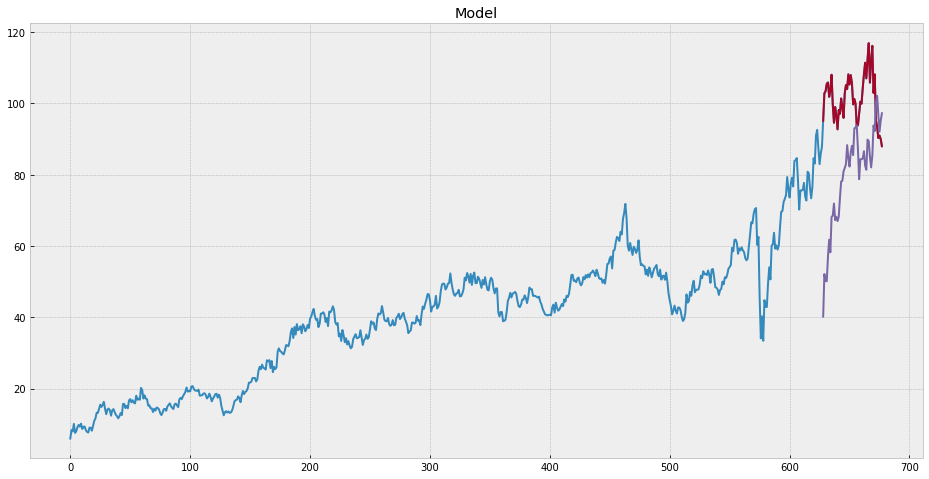

In [ ]:
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.show()